In [1]:
import warnings 
warnings.filterwarnings("ignore")
import os 

import tensorflow as tf

In [2]:
os.path.join('data','happy')

'data\\happy'

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [4]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [6]:
import cv2
import imghdr

In [7]:
data_dir='data'

In [8]:
os.listdir(os.path.join(data_dir,'happy'))

['360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '960x0.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'group-happy-people-party-isolated-white-background-31666248.jpg',
 'group-young-happy-people-with-their-hands-up_369728-62.jpg',
 'Happy-people-800x533.jpg',
 'happypeople-1024x679.jpg',
 'image (1).jpeg',
 'image (10).jpeg',
 'image (11).jpeg',
 'image (12).jpeg',
 'image (13).jpeg',
 'image (14).jpeg',
 'image (15).jpeg',
 'image (16).jpeg',
 'image (17).jpeg',
 'image (18).jpeg',
 'image (2).jpeg',
 'image (3).jpeg',
 'image (4).jpeg',
 'image (5).jpeg',
 'image (6).jpeg',
 'image (7).jpeg',
 'image (8).jpeg',
 'image (9).jpeg',
 'image.jpeg',
 'images (1).jpeg',
 'images (10).jpeg',
 'images (11).jpeg',
 'images (12).jpeg',
 'images (13).jpeg',
 'images (14).jpeg',
 'images (15).jpeg',
 'images (16).jpeg',
 'images (2).jpeg',
 'images (3).jpeg',
 'images (4).jpeg',
 'images (5).jpeg',
 'images (6).jpeg',
 'images (7).jpe

In [9]:
image_ext=['jpeg']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.formart(image_path))
                

In [11]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [12]:
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 99 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[1]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0])

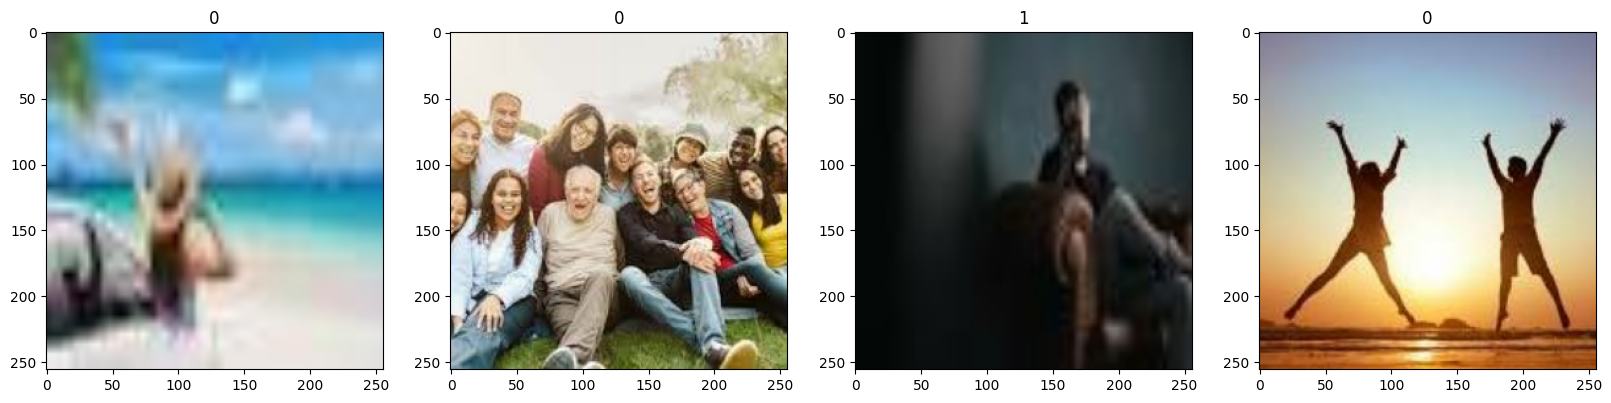

In [18]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
scaled = batch[0]/255

In [20]:
scaled.max()

1.0

In [21]:
data = data.map(lambda x,y:(x/255,y))

In [22]:
data.as_numpy_iterator().next()[0].max()

1.0

In [23]:
len(data)

4

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [25]:
test_size+val_size+train_size

4

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [31]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [33]:
logdir='logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 23s 1s/step - loss: 0.7679 - accuracy: 0.4844 - val_loss: 0.7168 - val_accuracy: 0.5312
Epoch 2/20
2/2 [==============================] - 1s 659ms/step - loss: 0.7170 - accuracy: 0.5312 - val_loss: 0.6100 - val_accuracy: 0.8438
Epoch 3/20
2/2 [==============================] - 1s 632ms/step - loss: 0.5546 - accuracy: 0.7500 - val_loss: 0.5483 - val_accuracy: 0.5938
Epoch 4/20
2/2 [==============================] - 1s 704ms/step - loss: 0.5880 - accuracy: 0.6250 - val_loss: 0.4895 - val_accuracy: 0.7500
Epoch 5/20
2/2 [==============================] - 1s 722ms/step - loss: 0.4991 - accuracy: 0.7656 - val_loss: 0.5244 - val_accuracy: 0.7500
Epoch 6/20
2/2 [==============================] - 1s 585ms/step - loss: 0.4394 - accuracy: 0.7812 - val_loss: 0.5097 - val_accuracy: 0.7188
Epoch 7/20
2/2 [==============================] - 1s 649ms/step - loss: 0.4063 - accuracy: 0.7969 - val_loss: 0.2393 - val_accuracy: 0.8750
Epoch 8/20
2/2 [======

In [40]:
hist.history

{'loss': [0.7679290771484375,
  0.7170357704162598,
  0.5545815229415894,
  0.5880278944969177,
  0.49909156560897827,
  0.439444363117218,
  0.406333327293396,
  0.305850625038147,
  0.2896445691585541,
  0.26295042037963867,
  0.2713722884654999,
  0.2445773482322693,
  0.18725770711898804,
  0.14336040616035461,
  0.21523746848106384,
  0.11562787741422653,
  0.13590793311595917,
  0.08325263857841492,
  0.06919382512569427,
  0.057978685945272446],
 'accuracy': [0.484375,
  0.53125,
  0.75,
  0.625,
  0.765625,
  0.78125,
  0.796875,
  0.859375,
  0.890625,
  0.859375,
  0.84375,
  0.890625,
  0.96875,
  0.984375,
  0.921875,
  0.96875,
  0.9375,
  0.96875,
  0.984375,
  0.984375],
 'val_loss': [0.7168384194374084,
  0.6099627017974854,
  0.5483132600784302,
  0.4895382523536682,
  0.5243579149246216,
  0.5096861124038696,
  0.23934152722358704,
  0.37943193316459656,
  0.29878532886505127,
  0.35179609060287476,
  0.20044630765914917,
  0.17846399545669556,
  0.13028380274772644,


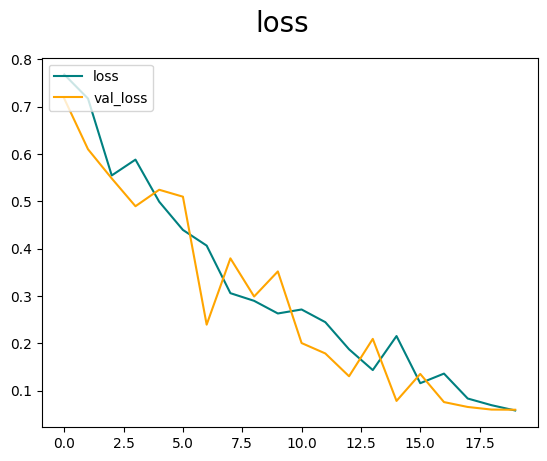

In [42]:
fig =  plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")

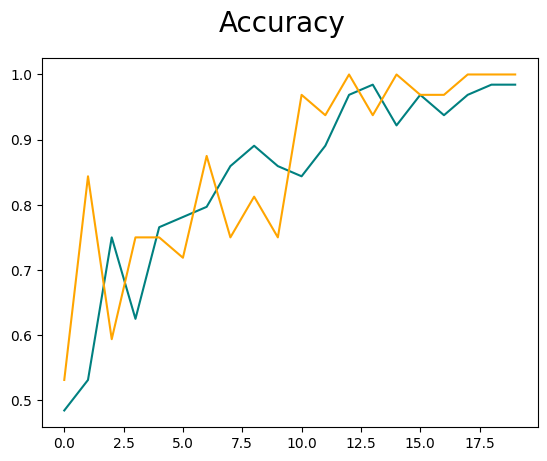

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.show()

In [49]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [50]:
pre = Precision()
re=Recall()
acc=BinaryAccuracy()

In [51]:
len(test)

1

In [52]:
for batch in test.as_numpy_iterator():
    x,y= batch
    yhat= model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 1s 631ms/step


In [54]:
print(pre.result().numpy(),re.result().numpy(),acc.result().numpy())

1.0 1.0 1.0


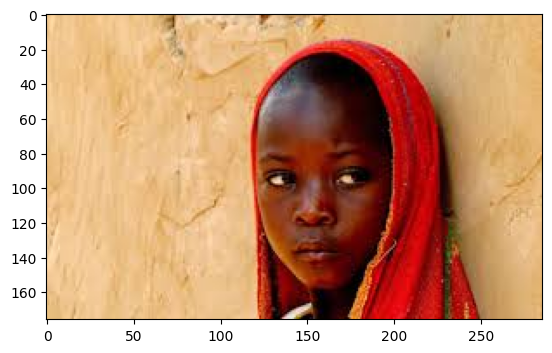

In [62]:
img = cv2.imread('sad.jpeg')

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

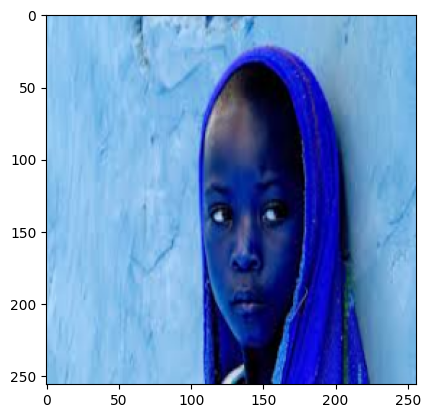

In [64]:
rezise = tf.image.resize(img,(256,256))
plt.imshow(rezise.numpy().astype(int))
plt.show()

In [69]:
yhat = model.predict(np.expand_dims(rezise/255,0))
yhat

1/1 [==============================] - 0s 40ms/step


array([[0.99871993]], dtype=float32)

In [70]:
if yhat > 0.5:
    print(f'predicted class is Sad')
else:
    print(f'predicted class is happy')

predicted class is Sad


In [75]:
from tensorflow.keras.models import load_model 
model.save(os.path.join('models', 'happysadmodel.h5'))


In [76]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [77]:
new_model

In [78]:
yhat = model.predict(np.expand_dims(rezise/255,0))

1/1 [==============================] - 0s 39ms/step


In [79]:
if yhat > 0.5:
    print(f'predicted class is Sad')
else:
    print(f'predicted class is happy')

predicted class is Sad
